## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [4]:
inputdata = pd.read_csv('./input-test1.csv',skiprows = 6, sep=',')
inputdata

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
0,DP 0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0,0.002414
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


In [8]:
inputLabel = pd.read_csv('./ANN_Label/nonepeak_Mm_Label.csv', sep=',')
TrainLabel_ = inputLabel.iloc[:,1]
pd.set_option("display.max_rows",10)
pd.DataFrame(TrainLabel_)

,P10
0,0.000999
1,0.001042
2,0.001325
3,0.000816
4,0.000647
...,...
42,0.001233
43,0.000798
44,0.001372
45,0.000793


In [6]:
pd.DataFrame(TrainLabel_).describe()

,P10
count,47.000000
mean,0.001000
std,0.000239
min,0.000545
25%,0.000820
50%,0.000987
75%,0.001196
max,0.001485


In [10]:
peak_dp = np.array(pd.read_csv("./peak_dp.csv",header = None))[0]
nonepeak_dp = np.array(pd.read_csv("./nonepeak_dp.csv",header = None))[0]

# training, label 분리

In [11]:
TrainData_ = inputdata.iloc[:,1:-1]

In [12]:
pd.set_option('display.max_rows',10)
TrainData_

,P1,P2,P3,P4,P5,P6,P7,P8
0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0
1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6
2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8
3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6
4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8
...,...,...,...,...,...,...,...,...
96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6
97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2
98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0
99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8


In [13]:
nonepeak_dp

array([  6.,   8.,  10.,  11.,  12.,  14.,  15.,  18.,  19.,  23.,  24.,
        29.,  33.,  34.,  36.,  37.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  52.,  53.,  54.,  55.,  57.,  58.,  60.,  61.,  64.,  66.,
        69.,  73.,  74.,  76.,  80.,  81.,  83.,  84.,  89.,  92.,  96.,
        97.,  99., 100.])

In [14]:
TrainData = TrainData_.loc[nonepeak_dp,:]
TrainData

,P1,P2,P3,P4,P5,P6,P7,P8
6.0,80,82.2,99.0,85.4,112.2,109.0,100.6,81.4
8.0,80,83.0,95.8,113.4,93.4,118.6,106.2,85.8
10.0,80,83.8,82.2,81.0,97.4,90.6,90.6,119.8
11.0,80,84.2,91.4,83.8,104.6,101.8,116.6,99.4
12.0,80,84.6,112.2,102.2,111.4,107.4,109.0,103.0
...,...,...,...,...,...,...,...,...
92.0,80,116.6,105.8,93.4,85.4,91.0,91.8,107.0
96.0,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6
97.0,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2
99.0,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8


In [11]:
max_value = float(np.max(TrainLabel_))
min_value = float(np.min(TrainLabel_))

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [12]:
pd.set_option("Display.max_rows",10)
pd.DataFrame(TrainLabel)

,P10
0,0.982503
1,1.028585
2,1.329323
3,0.787838
4,0.608127
...,...
42,1.231898
43,0.768642
44,1.379715
45,0.763664


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [13]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [14]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [15]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction4.0/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:26.64830,   MAE: 26.59591,  MAPE: 2902.73%
[100 Epochs]    RMSE:0.30100,   MAE: 0.22214,  MAPE: 24.41%
[200 Epochs]    RMSE:0.20129,   MAE: 0.13962,  MAPE: 14.82%
[300 Epochs]    RMSE:0.27016,   MAE: 0.20892,  MAPE: 21.16%
[400 Epochs]    RMSE:0.35844,   MAE: 0.31549,  MAPE: 31.99%
[500 Epochs]    RMSE:0.31583,   MAE: 0.27053,  MAPE: 27.50%
[600 Epochs]    RMSE:0.15717,   MAE: 0.09973,  MAPE: 10.72%
[700 Epochs]    RMSE:0.22070,   MAE: 0.16242,  MAPE: 16.09%
[800 Epochs]    RMSE:0.18532,   MAE: 0.12703,  MAPE: 12.42%
[900 Epochs]    RMSE:0.15262,   MAE: 0.09426,  MAPE: 9.69%
[1000 Epochs]    RMSE:0.14640,   MAE: 0.10058,  MAPE: 11.32%
[1100 Epochs]    RMSE:0.20803,   MAE: 0.18190,  MAPE: 20.98%
[1200 Epochs]    RMSE:0.16366,   MAE: 0.12918,  MAPE: 15.16%
[1300 Epochs]    RMSE:0.15102,   MAE: 0.09712,

[2800 Epochs]    RMSE:0.13073,   MAE: 0.11438,  MAPE: 13.43%
[2900 Epochs]    RMSE:0.09612,   MAE: 0.07882,  MAPE: 8.26%
[3000 Epochs]    RMSE:0.08137,   MAE: 0.06140,  MAPE: 7.13%
[3100 Epochs]    RMSE:0.14573,   MAE: 0.12413,  MAPE: 14.79%
[3200 Epochs]    RMSE:0.11785,   MAE: 0.10387,  MAPE: 12.02%
[3300 Epochs]    RMSE:0.06031,   MAE: 0.04122,  MAPE: 4.68%
[3400 Epochs]    RMSE:0.13422,   MAE: 0.12037,  MAPE: 13.65%
[3500 Epochs]    RMSE:0.09951,   MAE: 0.08205,  MAPE: 9.76%
[3600 Epochs]    RMSE:0.08692,   MAE: 0.06529,  MAPE: 7.51%
[3700 Epochs]    RMSE:0.05709,   MAE: 0.04148,  MAPE: 4.58%
[3800 Epochs]    RMSE:0.09874,   MAE: 0.07944,  MAPE: 8.08%
[3900 Epochs]    RMSE:0.14738,   MAE: 0.13866,  MAPE: 15.76%
[4000 Epochs]    RMSE:0.12775,   MAE: 0.11614,  MAPE: 13.57%
[4100 Epochs]    RMSE:0.05383,   MAE: 0.03993,  MAPE: 4.67%
[4200 Epochs]    RMSE:0.07008,   MAE: 0.05958,  MAPE: 6.26%
[4300 Epochs]    RMSE:0.09996,   MAE: 0.08097,  MAPE: 9.20%
[4400 Epochs]    RMSE:0.07210,   M

[600 Epochs]    RMSE:0.35729,   MAE: 0.33209,  MAPE: 38.56%
[700 Epochs]    RMSE:0.17851,   MAE: 0.14355,  MAPE: 13.92%
[800 Epochs]    RMSE:0.23189,   MAE: 0.19986,  MAPE: 19.89%
[900 Epochs]    RMSE:0.11861,   MAE: 0.08515,  MAPE: 9.23%
[1000 Epochs]    RMSE:0.17206,   MAE: 0.15177,  MAPE: 17.52%
[1100 Epochs]    RMSE:0.37851,   MAE: 0.36160,  MAPE: 38.00%
[1200 Epochs]    RMSE:0.22357,   MAE: 0.19343,  MAPE: 19.18%
[1300 Epochs]    RMSE:0.11058,   MAE: 0.07935,  MAPE: 8.30%
[1400 Epochs]    RMSE:0.15946,   MAE: 0.13275,  MAPE: 15.33%
[1500 Epochs]    RMSE:0.27022,   MAE: 0.25174,  MAPE: 28.59%
[1600 Epochs]    RMSE:0.13367,   MAE: 0.11141,  MAPE: 11.40%
[1700 Epochs]    RMSE:0.12103,   MAE: 0.09991,  MAPE: 11.51%
[1800 Epochs]    RMSE:0.12520,   MAE: 0.10606,  MAPE: 12.29%
[1900 Epochs]    RMSE:0.13994,   MAE: 0.11983,  MAPE: 12.31%
[2000 Epochs]    RMSE:0.24243,   MAE: 0.22710,  MAPE: 25.95%
[2100 Epochs]    RMSE:0.12946,   MAE: 0.11043,  MAPE: 12.78%
[2200 Epochs]    RMSE:0.18386,

[3800 Epochs]    RMSE:0.16544,   MAE: 0.15207,  MAPE: 17.57%
[3900 Epochs]    RMSE:0.15933,   MAE: 0.14032,  MAPE: 14.48%
[4000 Epochs]    RMSE:0.08963,   MAE: 0.05330,  MAPE: 5.99%
[4100 Epochs]    RMSE:0.11467,   MAE: 0.08700,  MAPE: 9.25%
[4200 Epochs]    RMSE:0.08740,   MAE: 0.04734,  MAPE: 5.62%
[4300 Epochs]    RMSE:0.16163,   MAE: 0.14292,  MAPE: 14.89%
[4400 Epochs]    RMSE:0.08553,   MAE: 0.04566,  MAPE: 5.35%
[4500 Epochs]    RMSE:0.11459,   MAE: 0.09049,  MAPE: 9.54%
[4600 Epochs]    RMSE:0.12868,   MAE: 0.10812,  MAPE: 11.14%
[4700 Epochs]    RMSE:0.08549,   MAE: 0.04977,  MAPE: 5.82%
[4800 Epochs]    RMSE:0.12903,   MAE: 0.10815,  MAPE: 11.25%
[4900 Epochs]    RMSE:0.09937,   MAE: 0.07572,  MAPE: 8.96%

[Final Epochs]    RMSE:0.10217,   MAE: 0.07303,  MAPE: 7.70%


Trial No.9
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 30
[0 Epochs]    RMSE:8.10665,   MAE: 7.52760,  MAPE: 815.29%
[100 Epochs]    RMSE:0.51550,   MAE: 0.44723,  MAPE: 46

[1600 Epochs]    RMSE:0.13069,   MAE: 0.07825,  MAPE: 8.54%
[1700 Epochs]    RMSE:0.13302,   MAE: 0.08871,  MAPE: 10.00%
[1800 Epochs]    RMSE:0.12425,   MAE: 0.08703,  MAPE: 9.64%
[1900 Epochs]    RMSE:0.12253,   MAE: 0.08371,  MAPE: 9.42%
[2000 Epochs]    RMSE:0.11840,   MAE: 0.08089,  MAPE: 9.21%
[2100 Epochs]    RMSE:0.11997,   MAE: 0.08626,  MAPE: 9.78%
[2200 Epochs]    RMSE:0.14138,   MAE: 0.12267,  MAPE: 13.96%
[2300 Epochs]    RMSE:0.11196,   MAE: 0.08467,  MAPE: 9.64%
[2400 Epochs]    RMSE:0.11500,   MAE: 0.07450,  MAPE: 7.61%
[2500 Epochs]    RMSE:0.11309,   MAE: 0.07299,  MAPE: 7.33%
[2600 Epochs]    RMSE:0.09720,   MAE: 0.05561,  MAPE: 5.93%
[2700 Epochs]    RMSE:0.15771,   MAE: 0.14641,  MAPE: 16.37%
[2800 Epochs]    RMSE:0.09784,   MAE: 0.05597,  MAPE: 5.73%
[2900 Epochs]    RMSE:0.09365,   MAE: 0.06463,  MAPE: 7.17%
[3000 Epochs]    RMSE:0.09431,   MAE: 0.05901,  MAPE: 5.98%
[3100 Epochs]    RMSE:0.11076,   MAE: 0.07911,  MAPE: 7.81%
[3200 Epochs]    RMSE:0.10084,   MAE:

[4600 Epochs]    RMSE:0.20107,   MAE: 0.17042,  MAPE: 20.72%
[4700 Epochs]    RMSE:0.18445,   MAE: 0.15310,  MAPE: 18.65%
[4800 Epochs]    RMSE:0.10225,   MAE: 0.07911,  MAPE: 9.28%
[4900 Epochs]    RMSE:0.16481,   MAE: 0.14459,  MAPE: 14.66%

[Final Epochs]    RMSE:0.13946,   MAE: 0.11584,  MAPE: 14.17%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:62.64596,   MAE: 62.51762,  MAPE: 6838.82%
[100 Epochs]    RMSE:0.33518,   MAE: 0.22800,  MAPE: 24.94%
[200 Epochs]    RMSE:0.32777,   MAE: 0.26786,  MAPE: 33.32%
[300 Epochs]    RMSE:0.18012,   MAE: 0.14348,  MAPE: 16.25%
[400 Epochs]    RMSE:0.17528,   MAE: 0.14028,  MAPE: 16.56%
[500 Epochs]    RMSE:0.26739,   MAE: 0.22516,  MAPE: 27.40%
[600 Epochs]    RMSE:0.21577,   MAE: 0.18058,  MAPE: 21.76%
[700 Epochs]    RMSE:0.49546,   MAE: 0.46903,  MAPE: 54.32%
[800 Epochs]    RMSE:0.20344,   MAE: 0.16653,  MAPE: 20.46%
[900 Epochs]    RMSE:0.27199,   MAE: 0.23174,  MAPE:

[2400 Epochs]    RMSE:0.07828,   MAE: 0.05700,  MAPE: 6.88%
[2500 Epochs]    RMSE:0.07701,   MAE: 0.05205,  MAPE: 6.22%
[2600 Epochs]    RMSE:0.08787,   MAE: 0.05968,  MAPE: 7.27%
[2700 Epochs]    RMSE:0.08906,   MAE: 0.07359,  MAPE: 7.98%
[2800 Epochs]    RMSE:0.08500,   MAE: 0.06779,  MAPE: 7.38%
[2900 Epochs]    RMSE:0.08138,   MAE: 0.05849,  MAPE: 7.21%
[3000 Epochs]    RMSE:0.08368,   MAE: 0.06129,  MAPE: 7.16%
[3100 Epochs]    RMSE:0.10148,   MAE: 0.08487,  MAPE: 10.06%
[3200 Epochs]    RMSE:0.06099,   MAE: 0.04339,  MAPE: 4.98%
[3300 Epochs]    RMSE:0.08374,   MAE: 0.07078,  MAPE: 7.83%
[3400 Epochs]    RMSE:0.06366,   MAE: 0.04606,  MAPE: 5.48%
[3500 Epochs]    RMSE:0.08630,   MAE: 0.06792,  MAPE: 8.13%
[3600 Epochs]    RMSE:0.14171,   MAE: 0.13035,  MAPE: 14.99%
[3700 Epochs]    RMSE:0.07895,   MAE: 0.05860,  MAPE: 6.90%
[3800 Epochs]    RMSE:0.05676,   MAE: 0.04382,  MAPE: 5.02%
[3900 Epochs]    RMSE:0.06495,   MAE: 0.05226,  MAPE: 6.09%
[4000 Epochs]    RMSE:0.05585,   MAE: 

[400 Epochs]    RMSE:0.25234,   MAE: 0.21054,  MAPE: 22.94%
[500 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[600 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[700 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[800 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[900 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1000 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1100 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1200 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1300 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1400 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1500 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1600 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1700 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1800 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[1900 Epochs]    RMSE:0.25174,   MAE: 0.21036,  MAPE: 23.13%
[2000 Epochs]    RMSE:0.25174,

[3600 Epochs]    RMSE:0.02856,   MAE: 0.02227,  MAPE: 2.33%
[3700 Epochs]    RMSE:0.03454,   MAE: 0.02865,  MAPE: 3.19%
[3800 Epochs]    RMSE:0.01877,   MAE: 0.01576,  MAPE: 1.75%
[3900 Epochs]    RMSE:0.02207,   MAE: 0.01687,  MAPE: 1.79%
[4000 Epochs]    RMSE:0.03078,   MAE: 0.02309,  MAPE: 2.58%
[4100 Epochs]    RMSE:0.02746,   MAE: 0.02212,  MAPE: 2.48%
[4200 Epochs]    RMSE:0.02069,   MAE: 0.01769,  MAPE: 1.94%
[4300 Epochs]    RMSE:0.02531,   MAE: 0.01732,  MAPE: 1.77%
[4400 Epochs]    RMSE:0.03754,   MAE: 0.02924,  MAPE: 3.09%
[4500 Epochs]    RMSE:0.04764,   MAE: 0.03729,  MAPE: 4.14%
[4600 Epochs]    RMSE:0.02825,   MAE: 0.02391,  MAPE: 2.44%
[4700 Epochs]    RMSE:0.03335,   MAE: 0.02707,  MAPE: 2.94%
[4800 Epochs]    RMSE:0.04149,   MAE: 0.03106,  MAPE: 3.50%
[4900 Epochs]    RMSE:0.04969,   MAE: 0.04055,  MAPE: 4.04%

[Final Epochs]    RMSE:0.04626,   MAE: 0.03748,  MAPE: 3.99%


Trial No.22
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 50
Hidden 2 neuron : 1

[1600 Epochs]    RMSE:0.07669,   MAE: 0.06612,  MAPE: 7.19%
[1700 Epochs]    RMSE:0.08898,   MAE: 0.06766,  MAPE: 8.05%
[1800 Epochs]    RMSE:0.08739,   MAE: 0.07735,  MAPE: 8.14%
[1900 Epochs]    RMSE:0.07350,   MAE: 0.06497,  MAPE: 6.91%
[2000 Epochs]    RMSE:0.08747,   MAE: 0.06985,  MAPE: 7.37%
[2100 Epochs]    RMSE:0.09429,   MAE: 0.07785,  MAPE: 8.88%
[2200 Epochs]    RMSE:0.05653,   MAE: 0.04119,  MAPE: 4.72%
[2300 Epochs]    RMSE:0.05395,   MAE: 0.04493,  MAPE: 4.69%
[2400 Epochs]    RMSE:0.06380,   MAE: 0.05047,  MAPE: 5.17%
[2500 Epochs]    RMSE:0.05767,   MAE: 0.04660,  MAPE: 4.97%
[2600 Epochs]    RMSE:0.03870,   MAE: 0.02995,  MAPE: 3.16%
[2700 Epochs]    RMSE:0.03541,   MAE: 0.02478,  MAPE: 2.83%
[2800 Epochs]    RMSE:0.04410,   MAE: 0.03472,  MAPE: 3.90%
[2900 Epochs]    RMSE:0.04295,   MAE: 0.03696,  MAPE: 3.92%
[3000 Epochs]    RMSE:0.03622,   MAE: 0.02748,  MAPE: 3.14%
[3100 Epochs]    RMSE:0.02426,   MAE: 0.01919,  MAPE: 2.09%
[3200 Epochs]    RMSE:0.04650,   MAE: 0.

[4800 Epochs]    RMSE:0.03213,   MAE: 0.02350,  MAPE: 2.49%
[4900 Epochs]    RMSE:0.03311,   MAE: 0.02463,  MAPE: 2.60%

[Final Epochs]    RMSE:0.02602,   MAE: 0.02105,  MAPE: 2.12%


Trial No.27
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:28.74651,   MAE: 28.59643,  MAPE: 3132.47%
[100 Epochs]    RMSE:0.29475,   MAE: 0.22933,  MAPE: 22.23%
[200 Epochs]    RMSE:0.23454,   MAE: 0.18451,  MAPE: 22.13%
[300 Epochs]    RMSE:0.18058,   MAE: 0.14593,  MAPE: 17.00%
[400 Epochs]    RMSE:0.17326,   MAE: 0.12630,  MAPE: 15.61%
[500 Epochs]    RMSE:0.19736,   MAE: 0.16909,  MAPE: 17.33%
[600 Epochs]    RMSE:0.14908,   MAE: 0.11798,  MAPE: 12.42%
[700 Epochs]    RMSE:0.16613,   MAE: 0.13934,  MAPE: 14.13%
[800 Epochs]    RMSE:0.14511,   MAE: 0.11238,  MAPE: 12.60%
[900 Epochs]    RMSE:0.08343,   MAE: 0.06537,  MAPE: 7.01%
[1000 Epochs]    RMSE:0.06483,   MAE: 0.04596,  MAPE: 5.44%
[1100 Epochs]    RMSE:0.23194,   MAE: 0.21630,  MAPE: 24.

[2600 Epochs]    RMSE:0.04352,   MAE: 0.03717,  MAPE: 3.91%
[2700 Epochs]    RMSE:0.03799,   MAE: 0.03073,  MAPE: 3.38%
[2800 Epochs]    RMSE:0.03010,   MAE: 0.02176,  MAPE: 2.28%
[2900 Epochs]    RMSE:0.03819,   MAE: 0.03199,  MAPE: 3.51%
[3000 Epochs]    RMSE:0.01943,   MAE: 0.01598,  MAPE: 1.78%
[3100 Epochs]    RMSE:0.02205,   MAE: 0.01492,  MAPE: 1.52%
[3200 Epochs]    RMSE:0.03410,   MAE: 0.03047,  MAPE: 3.25%
[3300 Epochs]    RMSE:0.01675,   MAE: 0.01290,  MAPE: 1.43%
[3400 Epochs]    RMSE:0.04028,   MAE: 0.03229,  MAPE: 3.30%
[3500 Epochs]    RMSE:0.02872,   MAE: 0.02531,  MAPE: 2.78%
[3600 Epochs]    RMSE:0.03675,   MAE: 0.03014,  MAPE: 3.14%
[3700 Epochs]    RMSE:0.02424,   MAE: 0.02021,  MAPE: 2.23%
[3800 Epochs]    RMSE:0.03528,   MAE: 0.02845,  MAPE: 3.06%
[3900 Epochs]    RMSE:0.05311,   MAE: 0.04305,  MAPE: 4.23%
[4000 Epochs]    RMSE:0.02958,   MAE: 0.02648,  MAPE: 2.86%
[4100 Epochs]    RMSE:0.01975,   MAE: 0.01641,  MAPE: 1.69%
[4200 Epochs]    RMSE:0.03275,   MAE: 0.

[600 Epochs]    RMSE:0.18829,   MAE: 0.11951,  MAPE: 12.31%
[700 Epochs]    RMSE:0.20918,   MAE: 0.17180,  MAPE: 20.42%
[800 Epochs]    RMSE:0.18142,   MAE: 0.13697,  MAPE: 16.28%
[900 Epochs]    RMSE:0.19594,   MAE: 0.14475,  MAPE: 15.04%
[1000 Epochs]    RMSE:0.19241,   MAE: 0.13374,  MAPE: 13.50%
[1100 Epochs]    RMSE:0.20579,   MAE: 0.14869,  MAPE: 14.25%
[1200 Epochs]    RMSE:0.17443,   MAE: 0.11396,  MAPE: 11.64%
[1300 Epochs]    RMSE:0.15441,   MAE: 0.09284,  MAPE: 10.29%
[1400 Epochs]    RMSE:0.17072,   MAE: 0.12614,  MAPE: 15.01%
[1500 Epochs]    RMSE:0.15856,   MAE: 0.09143,  MAPE: 9.75%
[1600 Epochs]    RMSE:0.17535,   MAE: 0.13463,  MAPE: 16.15%
[1700 Epochs]    RMSE:0.15657,   MAE: 0.09632,  MAPE: 9.91%
[1800 Epochs]    RMSE:0.15461,   MAE: 0.09539,  MAPE: 10.22%
[1900 Epochs]    RMSE:0.15092,   MAE: 0.09040,  MAPE: 9.30%
[2000 Epochs]    RMSE:0.17206,   MAE: 0.12471,  MAPE: 11.76%
[2100 Epochs]    RMSE:0.13756,   MAE: 0.07563,  MAPE: 7.55%
[2200 Epochs]    RMSE:0.14133,  

[3800 Epochs]    RMSE:0.03295,   MAE: 0.02747,  MAPE: 2.96%
[3900 Epochs]    RMSE:0.02697,   MAE: 0.02046,  MAPE: 2.26%
[4000 Epochs]    RMSE:0.02289,   MAE: 0.01734,  MAPE: 1.90%
[4100 Epochs]    RMSE:0.05221,   MAE: 0.04318,  MAPE: 4.58%
[4200 Epochs]    RMSE:0.03410,   MAE: 0.02654,  MAPE: 2.82%
[4300 Epochs]    RMSE:0.04250,   MAE: 0.03087,  MAPE: 3.55%
[4400 Epochs]    RMSE:0.03270,   MAE: 0.02665,  MAPE: 2.92%
[4500 Epochs]    RMSE:0.04524,   MAE: 0.03561,  MAPE: 3.85%
[4600 Epochs]    RMSE:0.04435,   MAE: 0.03891,  MAPE: 3.94%
[4700 Epochs]    RMSE:0.03510,   MAE: 0.02482,  MAPE: 2.90%
[4800 Epochs]    RMSE:0.02887,   MAE: 0.02168,  MAPE: 2.28%
[4900 Epochs]    RMSE:0.03510,   MAE: 0.02831,  MAPE: 3.05%

[Final Epochs]    RMSE:0.03319,   MAE: 0.02770,  MAPE: 2.83%


Trial No.35
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 40
Hidden 2 neuron : 20
[0 Epochs]    RMSE:22.82629,   MAE: 22.76195,  MAPE: 2481.97%
[100 Epochs]    RMSE:0.42782,   MAE: 0.36092,  MAPE: 44.6

[1800 Epochs]    RMSE:0.17453,   MAE: 0.11084,  MAPE: 12.83%
[1900 Epochs]    RMSE:0.17918,   MAE: 0.10623,  MAPE: 12.24%
[2000 Epochs]    RMSE:0.17347,   MAE: 0.11851,  MAPE: 14.46%
[2100 Epochs]    RMSE:0.15486,   MAE: 0.08949,  MAPE: 10.87%
[2200 Epochs]    RMSE:0.16814,   MAE: 0.12453,  MAPE: 13.42%
[2300 Epochs]    RMSE:0.14253,   MAE: 0.08818,  MAPE: 10.67%
[2400 Epochs]    RMSE:0.13593,   MAE: 0.07593,  MAPE: 9.14%
[2500 Epochs]    RMSE:0.13464,   MAE: 0.06795,  MAPE: 8.31%
[2600 Epochs]    RMSE:0.11903,   MAE: 0.06340,  MAPE: 8.15%
[2700 Epochs]    RMSE:0.12834,   MAE: 0.09134,  MAPE: 10.81%
[2800 Epochs]    RMSE:0.11882,   MAE: 0.08340,  MAPE: 9.30%
[2900 Epochs]    RMSE:0.11091,   MAE: 0.07276,  MAPE: 8.77%
[3000 Epochs]    RMSE:0.10505,   MAE: 0.06929,  MAPE: 7.72%
[3100 Epochs]    RMSE:0.11185,   MAE: 0.08487,  MAPE: 9.23%
[3200 Epochs]    RMSE:0.08423,   MAE: 0.05492,  MAPE: 6.50%
[3300 Epochs]    RMSE:0.10581,   MAE: 0.08578,  MAPE: 10.14%
[3400 Epochs]    RMSE:0.08073,  


[Final Epochs]    RMSE:0.02761,   MAE: 0.02223,  MAPE: 2.43%


Trial No.40
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:73.11596,   MAE: 72.97501,  MAPE: 8011.40%
[100 Epochs]    RMSE:0.23267,   MAE: 0.18135,  MAPE: 19.09%
[200 Epochs]    RMSE:0.24860,   MAE: 0.19540,  MAPE: 18.37%
[300 Epochs]    RMSE:0.19562,   MAE: 0.16181,  MAPE: 18.57%
[400 Epochs]    RMSE:0.18450,   MAE: 0.14262,  MAPE: 16.84%
[500 Epochs]    RMSE:0.15204,   MAE: 0.09902,  MAPE: 10.15%
[600 Epochs]    RMSE:0.13360,   MAE: 0.08896,  MAPE: 9.10%
[700 Epochs]    RMSE:0.16333,   MAE: 0.12776,  MAPE: 13.08%
[800 Epochs]    RMSE:0.12058,   MAE: 0.08120,  MAPE: 8.46%
[900 Epochs]    RMSE:0.13988,   MAE: 0.11366,  MAPE: 11.47%
[1000 Epochs]    RMSE:0.13043,   MAE: 0.10273,  MAPE: 12.29%
[1100 Epochs]    RMSE:0.09750,   MAE: 0.07170,  MAPE: 7.92%
[1200 Epochs]    RMSE:0.09179,   MAE: 0.07474,  MAPE: 7.75%
[1300 Epochs]    RMSE:0.12400,   MAE: 0.10110,  MAPE: 11.2

[3000 Epochs]    RMSE:0.05185,   MAE: 0.03631,  MAPE: 3.93%
[3100 Epochs]    RMSE:0.04323,   MAE: 0.02937,  MAPE: 3.26%
[3200 Epochs]    RMSE:0.05274,   MAE: 0.03339,  MAPE: 3.53%
[3300 Epochs]    RMSE:0.03569,   MAE: 0.02910,  MAPE: 3.22%
[3400 Epochs]    RMSE:0.08777,   MAE: 0.06439,  MAPE: 6.81%
[3500 Epochs]    RMSE:0.10146,   MAE: 0.07313,  MAPE: 8.47%
[3600 Epochs]    RMSE:0.03024,   MAE: 0.02531,  MAPE: 2.66%
[3700 Epochs]    RMSE:0.03095,   MAE: 0.02520,  MAPE: 2.75%
[3800 Epochs]    RMSE:0.03247,   MAE: 0.02689,  MAPE: 2.89%
[3900 Epochs]    RMSE:0.04099,   MAE: 0.02854,  MAPE: 3.20%
[4000 Epochs]    RMSE:0.03484,   MAE: 0.02371,  MAPE: 2.65%
[4100 Epochs]    RMSE:0.02137,   MAE: 0.01639,  MAPE: 1.68%
[4200 Epochs]    RMSE:0.04158,   MAE: 0.03557,  MAPE: 3.55%
[4300 Epochs]    RMSE:0.02114,   MAE: 0.01670,  MAPE: 1.78%
[4400 Epochs]    RMSE:0.03581,   MAE: 0.02690,  MAPE: 2.98%
[4500 Epochs]    RMSE:0.01810,   MAE: 0.01348,  MAPE: 1.48%
[4600 Epochs]    RMSE:0.11796,   MAE: 0.

[1000 Epochs]    RMSE:0.08817,   MAE: 0.06563,  MAPE: 7.39%
[1100 Epochs]    RMSE:0.09308,   MAE: 0.06867,  MAPE: 7.74%
[1200 Epochs]    RMSE:0.08188,   MAE: 0.06100,  MAPE: 6.63%
[1300 Epochs]    RMSE:0.14926,   MAE: 0.11621,  MAPE: 13.42%
[1400 Epochs]    RMSE:0.11712,   MAE: 0.09083,  MAPE: 10.18%
[1500 Epochs]    RMSE:0.08212,   MAE: 0.06790,  MAPE: 7.68%
[1600 Epochs]    RMSE:0.06175,   MAE: 0.04297,  MAPE: 4.57%
[1700 Epochs]    RMSE:0.13767,   MAE: 0.11306,  MAPE: 13.24%
[1800 Epochs]    RMSE:0.06444,   MAE: 0.05149,  MAPE: 5.24%
[1900 Epochs]    RMSE:0.09156,   MAE: 0.06862,  MAPE: 6.89%
[2000 Epochs]    RMSE:0.05732,   MAE: 0.04141,  MAPE: 4.46%
[2100 Epochs]    RMSE:0.05498,   MAE: 0.04675,  MAPE: 4.85%
[2200 Epochs]    RMSE:0.04462,   MAE: 0.03282,  MAPE: 3.76%
[2300 Epochs]    RMSE:0.03531,   MAE: 0.02921,  MAPE: 3.27%
[2400 Epochs]    RMSE:0.05618,   MAE: 0.04468,  MAPE: 4.95%
[2500 Epochs]    RMSE:0.03225,   MAE: 0.02576,  MAPE: 2.86%
[2600 Epochs]    RMSE:0.05112,   MAE:

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [16]:
for M in range(1):

    Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction4.0/Tr_result_epoch5000.csv')
    learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
    Epoch          = 20000
    
    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    
    ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in,
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

    ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
    
    # 모델 저장
    model.save('D:/testoneblow/MLmodels/BestModel_2DOF_0410_M%d.h5'%(M+1))
    
    # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("D:/testoneblow/MLmodels/BestModel_2DOF_0410_M%d_history.csv"%(M+1), index=None)




Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:39.59303,   MAE: 39.33482,  MAPE: 4286.31%
[100 Epochs]    RMSE:0.25801,   MAE: 0.20122,  MAPE: 22.30%
[200 Epochs]    RMSE:0.18712,   MAE: 0.14845,  MAPE: 16.40%
[300 Epochs]    RMSE:0.19818,   MAE: 0.16674,  MAPE: 19.52%
[400 Epochs]    RMSE:0.16625,   MAE: 0.12793,  MAPE: 14.79%
[500 Epochs]    RMSE:0.16991,   MAE: 0.13497,  MAPE: 16.30%
[600 Epochs]    RMSE:0.17653,   MAE: 0.13488,  MAPE: 16.47%
[700 Epochs]    RMSE:0.13838,   MAE: 0.09069,  MAPE: 10.34%
[800 Epochs]    RMSE:0.14263,   MAE: 0.09864,  MAPE: 10.77%
[900 Epochs]    RMSE:0.12375,   MAE: 0.07939,  MAPE: 9.10%
[1000 Epochs]    RMSE:0.12203,   MAE: 0.08693,  MAPE: 9.68%
[1100 Epochs]    RMSE:0.10910,   MAE: 0.06945,  MAPE: 7.80%
[1200 Epochs]    RMSE:0.12117,   MAE: 0.08761,  MAPE: 9.27%
[1300 Epochs]    RMSE:0.10071,   MAE: 0.07067,  MAPE: 7.70%
[1400 Epochs]    RMSE:0.09592,   MAE: 0.06752,  MAPE: 7.35%
[1500 Epoch

[13600 Epochs]    RMSE:0.01629,   MAE: 0.01238,  MAPE: 1.22%
[13700 Epochs]    RMSE:0.01441,   MAE: 0.01044,  MAPE: 1.00%
[13800 Epochs]    RMSE:0.01841,   MAE: 0.01425,  MAPE: 1.44%
[13900 Epochs]    RMSE:0.01446,   MAE: 0.01113,  MAPE: 1.14%
[14000 Epochs]    RMSE:0.01319,   MAE: 0.00906,  MAPE: 0.91%
[14100 Epochs]    RMSE:0.01524,   MAE: 0.01087,  MAPE: 1.12%
[14200 Epochs]    RMSE:0.02683,   MAE: 0.01996,  MAPE: 2.18%
[14300 Epochs]    RMSE:0.09551,   MAE: 0.05101,  MAPE: 5.52%
[14400 Epochs]    RMSE:0.02164,   MAE: 0.01672,  MAPE: 1.61%
[14500 Epochs]    RMSE:0.01337,   MAE: 0.01045,  MAPE: 1.04%
[14600 Epochs]    RMSE:0.01311,   MAE: 0.00990,  MAPE: 0.99%
[14700 Epochs]    RMSE:0.01027,   MAE: 0.00664,  MAPE: 0.68%
[14800 Epochs]    RMSE:0.01356,   MAE: 0.01112,  MAPE: 1.20%
[14900 Epochs]    RMSE:0.01698,   MAE: 0.01294,  MAPE: 1.30%
[15000 Epochs]    RMSE:0.01491,   MAE: 0.01174,  MAPE: 1.18%
[15100 Epochs]    RMSE:0.01552,   MAE: 0.01276,  MAPE: 1.43%
[15200 Epochs]    RMSE:0

(0.0, 100.0)

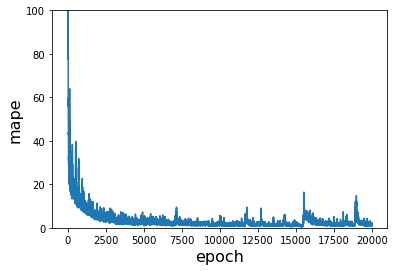

In [17]:
plt.plot(BestModel_temp.history['mape'])

plt.ylabel("mape", fontsize='16')
plt.xlabel("epoch", fontsize='16')
plt.ylim(0,100)

In [18]:
(model.predict(TrainData)-0.5)*dist_value+min_value

array([[0.00100939],
       [0.00105611],
       [0.00133817],
       [0.00082952],
       [0.00064984],
       [0.00101913],
       [0.00103394],
       [0.00054829],
       [0.00146319],
       [0.00083283],
       [0.00125186],
       [0.00087445],
       [0.00079185],
       [0.00153016],
       [0.00086534],
       [0.00100572],
       [0.00144717],
       [0.00123512],
       [0.00085994],
       [0.00123831],
       [0.00109635],
       [0.00087216],
       [0.00083261],
       [0.00139563],
       [0.00083337],
       [0.00093827],
       [0.00127338],
       [0.00054829],
       [0.00097449],
       [0.0007545 ],
       [0.00080185],
       [0.00112138],
       [0.00116348],
       [0.00113884],
       [0.00136316],
       [0.00122237],
       [0.0007013 ],
       [0.00073432],
       [0.00112586],
       [0.00094495],
       [0.00101469],
       [0.00087147],
       [0.00126921],
       [0.00080496],
       [0.00137565],
       [0.00080629],
       [0.00090426]], dtype=float3

In [19]:
type(TrainLabel_)

pandas.core.series.Series

In [20]:
ErrorTable = np.zeros((TrainLabel.shape[0],4))
ErrorTable[:,0] = TrainLabel_
for i in range(TrainLabel.shape[0]):
    a = ((model.predict(TrainData)-0.5)*dist_value+min_value)[i]
    ErrorTable[i,1] = a
    ErrorTable[i,2] = ((TrainLabel_[i]-a)/TrainLabel_[i])*100
    ErrorTable[i,3] = np.abs(((TrainLabel_[i]-a)/TrainLabel_[i])*100)

In [21]:
pd.set_option("display.max_rows",53)
ErrorTable = pd.DataFrame(ErrorTable)
ErrorTable

,0,1,2,3
0,0.000999,0.001009,-1.074111,1.074111
1,0.001042,0.001056,-1.354107,1.354107
2,0.001325,0.001338,-1.008332,1.008332
3,0.000816,0.000830,-1.707821,1.707821
4,0.000647,0.000650,-0.502062,0.502062
5,0.001011,0.001019,-0.836248,0.836248
6,0.001025,0.001034,-0.845401,0.845401
7,0.000545,0.000548,-0.620330,0.620330
8,0.001441,0.001463,-1.526315,1.526315
9,0.000832,0.000833,-0.134070,0.134070


In [22]:
ErrorTable.to_csv('D:/testoneblow/ANN_prediction4.0/nonepeak_Mm_Label/ErrorTable.csv')

## K fold

In [24]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)
FoldDataNo

9

In [25]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  =  TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,P1,P2,P3,P4,P5,P6,P7,P8
6.0,80,82.2,99.0,85.4,112.2,109.0,100.6,81.4
8.0,80,83.0,95.8,113.4,93.4,118.6,106.2,85.8
10.0,80,83.8,82.2,81.0,97.4,90.6,90.6,119.8
11.0,80,84.2,91.4,83.8,104.6,101.8,116.6,99.4
12.0,80,84.6,112.2,102.2,111.4,107.4,109.0,103.0
14.0,80,85.4,89.8,96.2,107.4,85.8,115.4,113.4
15.0,80,85.8,86.2,107.4,88.6,106.6,99.0,92.6
18.0,80,87.0,92.2,117.4,87.8,115.8,113.8,112.6
19.0,80,87.4,119.8,83.0,82.2,117.8,93.8,84.2


In [26]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((38, 8), (38, 1))

In [27]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1

In [28]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction4.0/nonepeak_Mm_Label/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/ANN_prediction4.0/nonepeak_Mm_Label/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/ANN_prediction4.0/nonepeak_Mm_Label/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:36.83224,   MAE: 36.73750,  MAPE: 3975.66%
[100 Epochs]    RMSE:0.20479,   MAE: 0.13900,  MAPE: 15.57%
[200 Epochs]    RMSE:0.18063,   MAE: 0.12080,  MAPE: 13.01%
[300 Epochs]    RMSE:0.17515,   MAE: 0.13304,  MAPE: 14.97%
[400 Epochs]    RMSE:0.19307,   MAE: 0.16101,  MAPE: 18.33%
[500 Epochs]    RMSE:0.16460,   MAE: 0.12421,  MAPE: 13.73%
[600 Epochs]    RMSE:0.16733,   MAE: 0.10611,  MAPE: 10.56%
[700 Epochs]    RMSE:0.15157,   MAE: 0.09324,  MAPE: 9.33%
[800 Epochs]    RMSE:0.14719,   MAE: 0.08500,  MAPE: 8.34%
[900 Epochs]    RMSE:0.13140,   MAE: 0.08735,  MAPE: 9.33%
[1000 Epochs]    RMSE:0.10878,   MAE: 0.06115,  MAPE: 6.34%
[1100 Epochs]    RMSE:0.12217,   MAE: 0.07675,  MAPE: 7.37%
[1200 Epochs]    RMSE:0.11653,   MAE: 0.06819,  MAPE: 6.72%
[1300 Epochs]    RMSE:0.09318,   MAE: 0.05130,  MAPE: 4.97%
[1400 Epochs]    RMSE:0.08454,   MAE: 0.04714,  MAPE: 4.73%
[1500 Epochs]

[13600 Epochs]    RMSE:0.01188,   MAE: 0.00851,  MAPE: 0.99%
[13700 Epochs]    RMSE:0.01333,   MAE: 0.01046,  MAPE: 1.09%
[13800 Epochs]    RMSE:0.02539,   MAE: 0.01909,  MAPE: 1.81%
[13900 Epochs]    RMSE:0.01160,   MAE: 0.00827,  MAPE: 0.82%
[14000 Epochs]    RMSE:0.01092,   MAE: 0.00849,  MAPE: 0.83%
[14100 Epochs]    RMSE:0.02340,   MAE: 0.01860,  MAPE: 1.84%
[14200 Epochs]    RMSE:0.02263,   MAE: 0.01718,  MAPE: 1.56%
[14300 Epochs]    RMSE:0.01033,   MAE: 0.00807,  MAPE: 0.80%
[14400 Epochs]    RMSE:0.01391,   MAE: 0.01043,  MAPE: 1.05%
[14500 Epochs]    RMSE:0.00877,   MAE: 0.00680,  MAPE: 0.66%
[14600 Epochs]    RMSE:0.01673,   MAE: 0.01269,  MAPE: 1.30%
[14700 Epochs]    RMSE:0.01157,   MAE: 0.00891,  MAPE: 0.91%
[14800 Epochs]    RMSE:0.01252,   MAE: 0.01058,  MAPE: 1.13%
[14900 Epochs]    RMSE:0.15350,   MAE: 0.11418,  MAPE: 10.92%
[15000 Epochs]    RMSE:0.07716,   MAE: 0.04563,  MAPE: 4.84%
[15100 Epochs]    RMSE:0.06734,   MAE: 0.03508,  MAPE: 3.89%
[15200 Epochs]    RMSE:

[7000 Epochs]    RMSE:0.02118,   MAE: 0.01794,  MAPE: 1.86%
[7100 Epochs]    RMSE:0.02322,   MAE: 0.01826,  MAPE: 1.83%
[7200 Epochs]    RMSE:0.02263,   MAE: 0.01884,  MAPE: 2.02%
[7300 Epochs]    RMSE:0.01443,   MAE: 0.01084,  MAPE: 1.24%
[7400 Epochs]    RMSE:0.02341,   MAE: 0.01651,  MAPE: 1.71%
[7500 Epochs]    RMSE:0.02151,   MAE: 0.01677,  MAPE: 1.78%
[7600 Epochs]    RMSE:0.01933,   MAE: 0.01600,  MAPE: 1.81%
[7700 Epochs]    RMSE:0.02724,   MAE: 0.02104,  MAPE: 2.14%
[7800 Epochs]    RMSE:0.01573,   MAE: 0.01154,  MAPE: 1.25%
[7900 Epochs]    RMSE:0.01942,   MAE: 0.01482,  MAPE: 1.77%
[8000 Epochs]    RMSE:0.01943,   MAE: 0.01429,  MAPE: 1.57%
[8100 Epochs]    RMSE:0.02343,   MAE: 0.01607,  MAPE: 1.56%
[8200 Epochs]    RMSE:0.01255,   MAE: 0.01041,  MAPE: 1.18%
[8300 Epochs]    RMSE:0.02167,   MAE: 0.01674,  MAPE: 1.88%
[8400 Epochs]    RMSE:0.01956,   MAE: 0.01640,  MAPE: 1.66%
[8500 Epochs]    RMSE:0.02310,   MAE: 0.01722,  MAPE: 1.89%
[8600 Epochs]    RMSE:0.01774,   MAE: 0.

[400 Epochs]    RMSE:0.21445,   MAE: 0.17144,  MAPE: 21.15%
[500 Epochs]    RMSE:0.15328,   MAE: 0.11454,  MAPE: 13.65%
[600 Epochs]    RMSE:0.12937,   MAE: 0.09503,  MAPE: 11.16%
[700 Epochs]    RMSE:0.16786,   MAE: 0.12809,  MAPE: 15.71%
[800 Epochs]    RMSE:0.16742,   MAE: 0.13031,  MAPE: 15.70%
[900 Epochs]    RMSE:0.14726,   MAE: 0.11405,  MAPE: 13.36%
[1000 Epochs]    RMSE:0.14861,   MAE: 0.12125,  MAPE: 13.29%
[1100 Epochs]    RMSE:0.09486,   MAE: 0.07110,  MAPE: 7.61%
[1200 Epochs]    RMSE:0.11273,   MAE: 0.07887,  MAPE: 9.64%
[1300 Epochs]    RMSE:0.08863,   MAE: 0.06597,  MAPE: 7.69%
[1400 Epochs]    RMSE:0.11052,   MAE: 0.08158,  MAPE: 9.23%
[1500 Epochs]    RMSE:0.10544,   MAE: 0.08902,  MAPE: 9.53%
[1600 Epochs]    RMSE:0.05434,   MAE: 0.04372,  MAPE: 4.96%
[1700 Epochs]    RMSE:0.12232,   MAE: 0.09340,  MAPE: 9.28%
[1800 Epochs]    RMSE:0.09770,   MAE: 0.07147,  MAPE: 7.99%
[1900 Epochs]    RMSE:0.07173,   MAE: 0.06015,  MAPE: 6.48%
[2000 Epochs]    RMSE:0.06708,   MAE: 0

[14000 Epochs]    RMSE:0.12031,   MAE: 0.08116,  MAPE: 9.14%
[14100 Epochs]    RMSE:0.11067,   MAE: 0.05087,  MAPE: 5.26%
[14200 Epochs]    RMSE:0.10204,   MAE: 0.04523,  MAPE: 4.95%
[14300 Epochs]    RMSE:0.10998,   MAE: 0.05605,  MAPE: 6.00%
[14400 Epochs]    RMSE:0.11457,   MAE: 0.05554,  MAPE: 5.91%
[14500 Epochs]    RMSE:0.09349,   MAE: 0.04180,  MAPE: 4.30%
[14600 Epochs]    RMSE:0.10168,   MAE: 0.04439,  MAPE: 4.71%
[14700 Epochs]    RMSE:0.08682,   MAE: 0.03040,  MAPE: 3.09%
[14800 Epochs]    RMSE:0.08567,   MAE: 0.03662,  MAPE: 3.69%
[14900 Epochs]    RMSE:0.07537,   MAE: 0.03368,  MAPE: 3.56%
[15000 Epochs]    RMSE:0.07448,   MAE: 0.03089,  MAPE: 3.23%
[15100 Epochs]    RMSE:0.07489,   MAE: 0.03325,  MAPE: 3.46%
[15200 Epochs]    RMSE:0.06860,   MAE: 0.03276,  MAPE: 3.52%
[15300 Epochs]    RMSE:0.06829,   MAE: 0.03857,  MAPE: 4.35%
[15400 Epochs]    RMSE:0.03836,   MAE: 0.03003,  MAPE: 3.20%
[15500 Epochs]    RMSE:0.04077,   MAE: 0.02559,  MAPE: 2.83%
[15600 Epochs]    RMSE:0

[7400 Epochs]    RMSE:0.02472,   MAE: 0.01739,  MAPE: 1.61%
[7500 Epochs]    RMSE:0.04473,   MAE: 0.03022,  MAPE: 3.25%
[7600 Epochs]    RMSE:0.03230,   MAE: 0.02506,  MAPE: 2.66%
[7700 Epochs]    RMSE:0.01174,   MAE: 0.00905,  MAPE: 0.89%
[7800 Epochs]    RMSE:0.02238,   MAE: 0.01691,  MAPE: 1.70%
[7900 Epochs]    RMSE:0.02818,   MAE: 0.02035,  MAPE: 2.05%
[8000 Epochs]    RMSE:0.02097,   MAE: 0.01591,  MAPE: 1.58%
[8100 Epochs]    RMSE:0.02715,   MAE: 0.02207,  MAPE: 2.42%
[8200 Epochs]    RMSE:0.01181,   MAE: 0.00913,  MAPE: 0.95%
[8300 Epochs]    RMSE:0.02927,   MAE: 0.02272,  MAPE: 2.35%
[8400 Epochs]    RMSE:0.01990,   MAE: 0.01589,  MAPE: 1.60%
[8500 Epochs]    RMSE:0.01821,   MAE: 0.01261,  MAPE: 1.27%
[8600 Epochs]    RMSE:0.04638,   MAE: 0.02587,  MAPE: 2.78%
[8700 Epochs]    RMSE:0.02700,   MAE: 0.01831,  MAPE: 1.80%
[8800 Epochs]    RMSE:0.01897,   MAE: 0.01111,  MAPE: 1.18%
[8900 Epochs]    RMSE:0.03369,   MAE: 0.02662,  MAPE: 2.80%
[9000 Epochs]    RMSE:0.04416,   MAE: 0.

[800 Epochs]    RMSE:0.17649,   MAE: 0.13913,  MAPE: 15.90%
[900 Epochs]    RMSE:0.08339,   MAE: 0.05328,  MAPE: 6.20%
[1000 Epochs]    RMSE:0.09860,   MAE: 0.06707,  MAPE: 7.80%
[1100 Epochs]    RMSE:0.06060,   MAE: 0.04155,  MAPE: 4.48%
[1200 Epochs]    RMSE:0.04291,   MAE: 0.03224,  MAPE: 3.38%
[1300 Epochs]    RMSE:0.08326,   MAE: 0.07040,  MAPE: 7.18%
[1400 Epochs]    RMSE:0.06872,   MAE: 0.05349,  MAPE: 5.94%
[1500 Epochs]    RMSE:0.05404,   MAE: 0.03816,  MAPE: 4.32%
[1600 Epochs]    RMSE:0.06685,   MAE: 0.05458,  MAPE: 6.14%
[1700 Epochs]    RMSE:0.04571,   MAE: 0.03518,  MAPE: 3.57%
[1800 Epochs]    RMSE:0.05080,   MAE: 0.03880,  MAPE: 4.31%
[1900 Epochs]    RMSE:0.04040,   MAE: 0.03280,  MAPE: 3.48%
[2000 Epochs]    RMSE:0.04249,   MAE: 0.02860,  MAPE: 2.95%
[2100 Epochs]    RMSE:0.05109,   MAE: 0.03615,  MAPE: 4.07%
[2200 Epochs]    RMSE:0.02380,   MAE: 0.01843,  MAPE: 1.83%
[2300 Epochs]    RMSE:0.07998,   MAE: 0.04673,  MAPE: 4.42%
[2400 Epochs]    RMSE:0.03920,   MAE: 0.0

[14400 Epochs]    RMSE:0.02876,   MAE: 0.02167,  MAPE: 2.34%
[14500 Epochs]    RMSE:0.01803,   MAE: 0.01232,  MAPE: 1.36%
[14600 Epochs]    RMSE:0.01740,   MAE: 0.01336,  MAPE: 1.32%
[14700 Epochs]    RMSE:0.02059,   MAE: 0.01483,  MAPE: 1.54%
[14800 Epochs]    RMSE:0.00899,   MAE: 0.00695,  MAPE: 0.77%
[14900 Epochs]    RMSE:0.01148,   MAE: 0.00707,  MAPE: 0.72%
[15000 Epochs]    RMSE:0.01356,   MAE: 0.00979,  MAPE: 1.02%
[15100 Epochs]    RMSE:0.01154,   MAE: 0.00842,  MAPE: 0.84%
[15200 Epochs]    RMSE:0.01926,   MAE: 0.01221,  MAPE: 1.19%
[15300 Epochs]    RMSE:0.03144,   MAE: 0.02204,  MAPE: 2.38%
[15400 Epochs]    RMSE:0.01481,   MAE: 0.01052,  MAPE: 1.13%
[15500 Epochs]    RMSE:0.04032,   MAE: 0.02945,  MAPE: 2.92%
[15600 Epochs]    RMSE:0.01307,   MAE: 0.00895,  MAPE: 0.91%
[15700 Epochs]    RMSE:0.00745,   MAE: 0.00557,  MAPE: 0.58%
[15800 Epochs]    RMSE:0.01746,   MAE: 0.01225,  MAPE: 1.15%
[15900 Epochs]    RMSE:0.02410,   MAE: 0.01627,  MAPE: 1.67%
[16000 Epochs]    RMSE:0

In [29]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/ANN_prediction4.0/nonepeak_Mm_Label/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [30]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [39]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [40]:
# for F in range (Fold):
#     s1 = "real = ValidLabel_Fold%d"%(F+1)
#     exec(s1)
#     s2 = "predict = Model_Fold%d.predict(ValidData_Fold%d)"%(F+1,F+1)
#     exec(s2)
#     s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
#     exec(s3)

In [41]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,0.000999,0.001032,-3.293037,3.293037
1,0.001042,0.001134,-8.809195,8.809195
2,0.001325,0.000743,43.899944,43.899944
3,0.000816,0.001236,-51.588825,51.588825
4,0.000647,0.001105,-70.838945,70.838945
5,0.001011,0.000951,5.910760,5.910760
6,0.001025,0.000863,15.787263,15.787263
7,0.000545,0.001205,-121.184736,121.184736
8,0.001441,0.000815,43.447232,43.447232


In [50]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/ANN_prediction4.0/nonepeak_Mm_Label/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)

In [51]:
Result1

,0,1,2,3,4
0,0.000999,0.001032,-3.293037,3.293037,0.000033
1,0.001042,0.001134,-8.809195,8.809195,0.000092
2,0.001325,0.000743,43.899944,43.899944,0.000582
3,0.000816,0.001236,-51.588825,51.588825,0.000421
4,0.000647,0.001105,-70.838945,70.838945,0.000458
5,0.001011,0.000951,5.910760,5.910760,0.000060
6,0.001025,0.000863,15.787263,15.787263,0.000162
7,0.000545,0.001205,-121.184736,121.184736,0.000660
8,0.001441,0.000815,43.447232,43.447232,0.000626


In [43]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [44]:
average_Error_Fold

array([40.52888197, 20.25981386, 19.6679536 , 16.1320704 , 15.54063862])

In [45]:
average_Error = np.mean(average_Error_Fold)
average_Error

22.425871690331565

In [46]:
Max_Error_Fold

array([121.18473564,  38.04723212,  59.82451057,  69.55396963,
        43.31648097])